# 1 - 多层感知机

In [1]:
import torch
from d2l import torch as d2l
import matplotlib.pyplot as plt

## 1 - 1激活函数

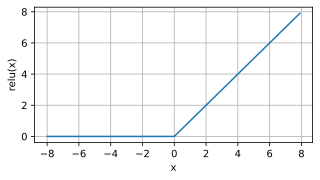

In [2]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad = True)
y = torch.relu(x)
d2l.plot(x.detach(), y.detach(), 'x', 'relu(x)', figsize = (5, 2.5))

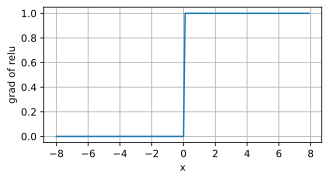

In [3]:
y.backward(torch.ones_like(x), retain_graph = True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of relu', figsize = (5, 2.5))

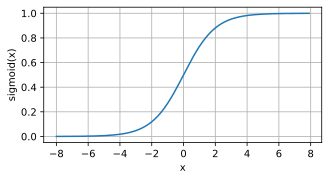

In [4]:
y = torch.sigmoid(x)
d2l.plot(x.detach(), y.detach(), 'x', 'sigmoid(x)', figsize = (5, 2.5))

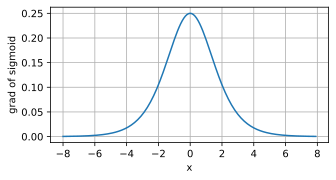

In [5]:
x.grad.data.zero_()
y.backward(torch.ones_like(x), retain_graph = True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of sigmoid', figsize = (5, 2.5))

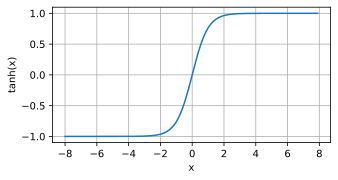

In [6]:
y = torch.tanh(x)
d2l.plot(x.detach(), y.detach(), 'x', 'tanh(x)', figsize = (5, 2.5))

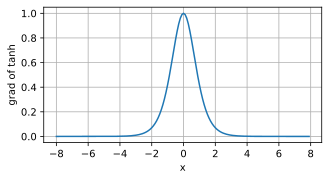

In [7]:
x.grad.data.zero_()
y.backward(torch.ones_like(x), retain_graph = True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of tanh', figsize = (5, 2.5))

# 2 - 多层感知机的从零开始实现

In [8]:
from torch import nn

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
train_iter.num_workers = 0
test_iter.num_workers = 0

## 2 - 1 初始化模型参数

In [9]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256

W1 = nn.Parameter(torch.randn(
    num_inputs, num_hiddens, requires_grad = True) * 0.01)
b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad = True))
W2 = nn.Parameter(torch.randn(
    num_hiddens, num_outputs, requires_grad = True) * 0.01)
b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad = True))

params = [W1, b1, W2, b2]

## 2 - 2 激活函数

In [10]:
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)

## 2 - 3 模型

In [11]:
def net(X):
    X = X.reshape((-1, num_inputs))
    H = relu(torch.matmul(X, W1) + b1)
    return (torch.matmul(H, W2) + b2)

## 2 - 4 损失函数

In [12]:
loss = nn.CrossEntropyLoss(reduction = 'none')

## 2 - 5 训练

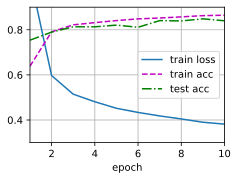

In [13]:
num_epochs, lr = 10, 0.1
updater = torch.optim.SGD(params, lr = lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

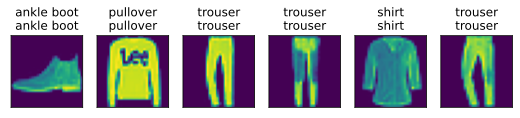

In [14]:
d2l.predict_ch3(net, test_iter)

# 3 - 多层感知机的简洁实现

## 3 - 1 模型

In [15]:
net = nn.Sequential(nn.Flatten(),
                    nn.Linear(784, 256),
                    nn.ReLU(),
                    nn.Linear(256, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std = 0.01)

net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=10, bias=True)
)

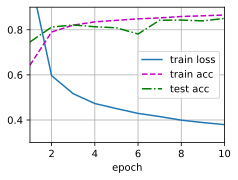

In [16]:
batch_size, lr, num_epochs = 256, 0.1, 10
loss = nn.CrossEntropyLoss(reduction = 'none')
trainer = torch.optim.SGD(net.parameters(), lr = lr)

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
train_iter.num_workers = 0
test_iter.num_workers = 0
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

# 4 - 模型选择、欠拟合和过拟合

## 4 - 1 生成数据集

In [ ]:
max_degree = 20 #多项式的最大阶数
n_train, n_test = 100, 100 #训练和测试数据集大小
true_w = np.zeros(max_degree) #分配大量的空间
true_w[0 : 4] = np.array([5, 1.2, -3.4, 5.6])

features = np.random.normal()